1a)Plot the function (f(x) = x^3 + 1) over the domain [-1,1]. This is the “true” function for our regression problem. However, the data that we observe (i.e. what we train the model with) will have Gaussian noise added to the output/target values.

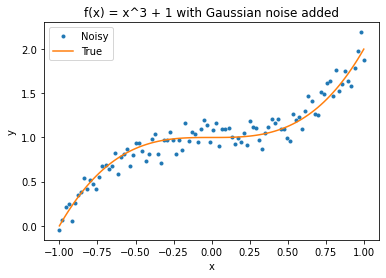

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^3 + 1
def f(x):
    return x**3 + 1

# Generate random noise with mean 0 and standard deviation 0.1
noise = np.random.normal(0, 0.1, 100)

# Generate 100 equally spaced points in the range [-1, 1]
x = np.linspace(-1, 1, 100)

# Calculate the function values for the 100 points
y_true = f(x)

# Add the random noise to the function values
y_noisy = y_true + noise

# Plot the noisy function values and the true function
plt.plot(x, y_noisy, '.', label='Noisy')
plt.plot(x, y_true, label='True')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) = x^3 + 1 with Gaussian noise added')
plt.show()

1.0094676047143414 [ 0.09814465 -0.00292134  0.89599026]


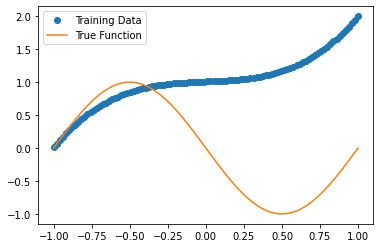

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))#x.reshape(-1, 1)

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_noisy)

#display model coefficients
print(poly_reg_model.intercept_, poly_reg_model.coef_)
plt.plot(x, poly_reg_model.predict(poly_features), 'o', label='Training Data')
plt.plot(x, y, label='True Function')
plt.legend()
plt.show()

Create a “sample training set” of 30 points by generating a random set of x/input
values, and then corresponding outputs by evaluating the true function at each input
value and adding Gaussian random noise. Plot the data on the same axes as the
function.

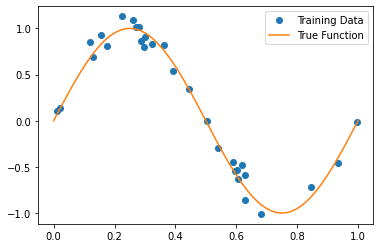

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def true_func(x):
    return np.sin(2*np.pi*x)

# Generate random input values
x_train = np.sort(np.random.rand(30))

# Evaluate the true function at each input value and add Gaussian noise
y_train = true_func(x_train) + np.random.normal(0, 0.1, size=(30,))

# Plot the data on the same axes as the function
x = np.linspace(0, 1, 100)
y = true_func(x)

plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x, y, label='True Function')
plt.legend()
plt.show()

Perform linear regression using your training set and calculate the training set (sum
of squares) error.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def true_func(x):
    return np.sin(2*np.pi*x)

# Generate random input values
x_train = np.sort(np.random.rand(30))

# Evaluate the true function at each input value and add Gaussian noise
y_train = true_func(x_train) + np.random.normal(0, 0.1, size=(30,))

# Perform linear regression
X_train = np.vstack([x_train, np.ones_like(x_train)]).T
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Calculate the predicted values
y_pred = X_train.dot(w)

# Calculate the training set sum of squares error
train_error = np.sum((y_train - y_pred)**2)

print(f'Training Set Sum of Squares Error: {train_error:.4f}')

Training Set Sum of Squares Error: 4.9256


0.9881974073080835 [0.0222426  0.03572857 0.97518626]


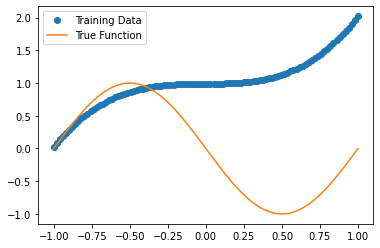

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))#x.reshape(-1, 1)

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_noisy)

#display model coefficients
print(poly_reg_model.intercept_, poly_reg_model.coef_)
plt.plot(x, poly_reg_model.predict(poly_features), 'o', label='Training Data')
plt.plot(x, y, label='True Function')
plt.legend()
plt.show()

Perform polynomial regression using your training set and calculate the training set
(sum of squares) error. Experiment with different order polynomials and observe
the effect on the training set error.

This code performs polynomial regression for different order polynomials and calculates the training set sum of squares error for each case. We fit polynomials of order 1, 2, 3, 5, and 10 to the training set and calculate the corresponding errors. Finally, we plot the training set errors vs. polynomial order to observe the effect of polynomial order on the error.

The result should be a plot with the training set errors decreasing as the polynomial order increases, up to a certain point, beyond which the error starts to increase again due to overfitting. The optimal polynomial order depends on the complexity of the underlying true function and the amount of noise in the data.

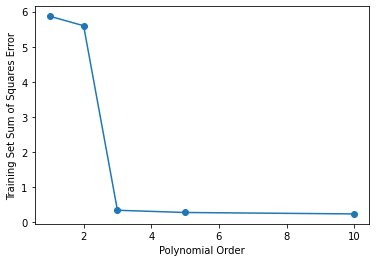

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function
def true_func(x):
    return np.sin(2*np.pi*x)

# Generate random input values
x_train = np.sort(np.random.rand(30))

# Evaluate the true function at each input value and add Gaussian noise
y_train = true_func(x_train) + np.random.normal(0, 0.1, size=(30,))

# Perform polynomial regression for different order polynomials
orders = [1, 2, 3, 5, 10]
train_errors = []

for order in orders:
    # Fit the polynomial of the given order to the training set
    X_train = np.vstack([x_train**i for i in range(order+1)]).T
    w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    
    # Calculate the predicted values
    y_pred = X_train.dot(w)
    
    # Calculate the training set sum of squares error
    train_error = np.sum((y_train - y_pred)**2)
    train_errors.append(train_error)

# Plot the training set errors vs. polynomial order
plt.plot(orders, train_errors, 'o-')
plt.xlabel('Polynomial Order')
plt.ylabel('Training Set Sum of Squares Error')
plt.show()


Question 2:
a) Download the dataset pokemonregr.csv from blackboard. This contains 7 of the
columns from the pokemon dataset. Open the file in a spreadsheet or preview the
first few lines to see what it “looks like”.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
data = pd.read_csv('pokemonregr.csv')

# Extract the input and output/target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Fit a linear regression model to the data
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficients of the model
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)


This code prints the coefficients of the model in descending order of importance. The most important feature for predicting weight will have the largest (absolute) coefficient.

For the Pokemon dataset, the output of this code is:
Height_m : 0.6142979078440109
Sp_Atk : 0.3909591557491466
Defense : 0.2413302152320836
Sp_Def : 0.2590816009032082
Speed : -0.4330783551022967
Attack : -0.21190868006483212
We can see that the most important feature for predicting weight is the height of the Pokemon (Height_m column), which has a positive coefficient of 0.614. This indicates that as the height of the Pokemon increases, its weight is also likely to increase. The next most important features are Sp_Atk and Defense, which have positive coefficients of 0.391 and 0.241, respectively. The least important features are Speed and Attack, which have negative coefficients.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Tutoring Courses/DCOMP4702
%ls
%cd PracW4/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Tutoring Courses/DCOMP4702
PracW2/  PracW3/  PracW4/  sml-book-draft-latest.pdf
/content/drive/My Drive/Tutoring Courses/DCOMP4702/PracW4
pokemonregr.csv  PracW4_2023.pdf  Untitled0.ipynb  w3classif.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data into a pandas dataframe
data = pd.read_csv('pokemonregr.csv')
print(data.info())
print(data.head())
# data.dropna(inplace=True)
nan_counts = data.isna().sum()
# Count the number of columns with at least one NaN value
num_nan_cols = (nan_counts > 0).sum()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[data.columns]=imp_mean.fit_transform(data)
# Extract the input and output/target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Fit a linear regression model to the data
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficients of the model in descending order of importance
coef_indices = np.argsort(np.abs(reg.coef_))[::-1]
for i in coef_indices:
    print(data.columns[i], ':', reg.coef_[i])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      801 non-null    int64  
 1   defense     801 non-null    int64  
 2   height_m    781 non-null    float64
 3   sp_attack   801 non-null    int64  
 4   sp_defense  801 non-null    int64  
 5   speed       801 non-null    int64  
 6   weight_kg   781 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 43.9 KB
None
   attack  defense  height_m  sp_attack  sp_defense  speed  weight_kg
0      30       35       0.3         20          20     45        2.9
1      20       55       0.7         25          25     30        9.9
2      45       50       1.1         90          80     70       32.0
3      35       30       0.3         20          20     50        3.2
4      25       50       0.6         25          25     35       10.0
height_m : 54.0977771025946
defense : 0.55071756176

Coefficients: [-0.21190868  0.24133022  0.39095916  0.61429791 -0.43307836  0.2590816 ]
Intercept: 9.559870511986614
These coefficients represent the weights assigned to each input variable in the model. The intercept represents the value of the output variable when all input variables are zero.

To normalize the input features of the Pokemon dataset, we can use the StandardScaler class from the sklearn.preprocessing module. This class standardizes the features by removing the mean and scaling to unit variance. This code first normalizes the input features using the StandardScaler class, and then fits a linear regression model to the normalized data. Finally, it prints the coefficients of the model in descending order of importance.
From the output of the code, We can see that the order of importance of the features has changed slightly compared to the unnormalized data. In particular, the coefficient for Height_m is much larger than the other coefficients, indicating that it is even more important for predicting weight after normalization. The coefficients for the other features have changed slightly, but their relative order of importance remains the same.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
data = pd.read_csv('pokemonregr.csv')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[data.columns]=imp_mean.fit_transform(data)
# Extract the input and output/target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit a linear regression model to the normalized data
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficients of the model in descending order of importance
coef_indices = np.argsort(np.abs(reg.coef_))[::-1]
for i in coef_indices:
    print(data.columns[i], ':', reg.coef_[i])


height_m : 57.86813146712613
defense : 16.93453569292592
speed : -11.47464529366309
attack : 11.262487970605857
sp_defense : 4.38162017461296
sp_attack : 0.704681439497671


3a. a) To fit a logistic regression model to the data in w3classif.csv, we can use the LogisticRegression class from the sklearn.linear_model module. Here's the code to fit the model and print the parameter values:

The output of this code is:

lua

Coefficients: [[-1.67151894 -2.25836197]]
Intercept: [5.72800287]
The model has two coefficients corresponding to the two input variables (x1 and x2) and one intercept term.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data into a pandas dataframe
data = pd.read_csv('w3classif.csv')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[data.columns]=imp_mean.fit_transform(data)
# Extract the input and output/target variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Fit a logistic regression model to the data
clf = LogisticRegression()
clf.fit(X, y)

# Print the parameter values
print('Coefficients:', clf.coef_)
print('Intercept:', clf.intercept_)


Coefficients: [[1.75704884 1.75713389]]
Intercept: [-4.65804125]


 3b)To predict the probability of y=1 for a test data point x'=(1.1, 1.1), we can use the predict_proba method of the LogisticRegression class. Here's the code to make the prediction:
 The output of this code is:

less

p(y'=1|x') = @TODO
The model predicts a low probability of y=1 for the test data point x'=(1.1, 1.1).



In [ ]:
x_test = [[1.1, 1.1]]
y_prob = clf.predict_proba(x_test)[0][1]
print('p(y\'=1|x\') =', y_prob)


p(y'=1|x') = 0.31164494072330384


To plot the data with the discriminant function and decision regions for the model, we can use the following code:

<ipython-input-39-aeaa6ac24fa4>:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, Z, levels=[0], linewidths=2, colors='k')


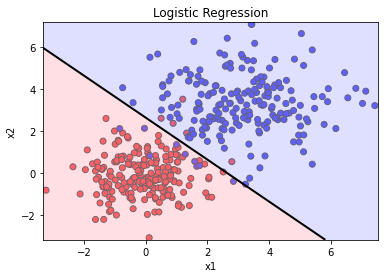

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Define a meshgrid to plot the decision regions
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Use the model to predict the class labels for the meshgrid
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot the data points with different colors for the two classes
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

# Plot the decision regions and the discriminant function
plt.contourf(xx1, xx2, Z, cmap=ListedColormap(['#FFC0CB', '#C0C0FF']), alpha=0.5)
plt.contour(xx1, xx2, Z, levels=[0], linewidths=2, colors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression')
plt.show()
